# Comparisons, Masks, and Boolean Logic

# A. Example: Counting Rainy Days

In [2]:
import numpy as np
from vega_datasets import data

In [3]:
rainfall_mm = np.array(data.seattle_weather().set_index('date')['precipitation']['2015']
                       )
rainfall_mm

array([ 0. ,  1.5,  0. , 10.2,  8.1,  0. ,  0. ,  0. ,  0.3,  5.8,  1.5,
        0. ,  0. ,  0. ,  9.7,  0. , 26.2, 21.3,  0.5,  0. ,  0. ,  0.8,
        5.8,  0.5,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ,  1.5,  7.4,
        1.3,  8.4, 26.2, 17.3, 23.6,  3.6,  6.1,  0.3,  0. ,  1. ,  0. ,
        0.3,  0. ,  0. ,  0. ,  0. ,  4.6,  0.8,  0. ,  0. ,  0. ,  0. ,
        4.1,  9.4, 18.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.8,  2.5,  0. ,  2. , 17. , 55.9,  1. ,  0.8,  0. ,
        0. ,  4.1,  3.8,  1. ,  8.1,  7.6,  5.1,  0. ,  1. ,  0. ,  0. ,
        1.8,  1. ,  5.1,  0. ,  1.5,  0. ,  0. ,  1. ,  0.5,  0. ,  0. ,
       10.9,  0. ,  0. , 14. ,  3.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        5.6,  0. ,  3. ,  3.3,  1.3,  0. ,  0.3,  1.8,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  6.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  4.3,
        4.1,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0

In [4]:
len(rainfall_mm)

365

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\JCA\AppData\Local\Temp\ipykernel_15644\2079592702.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


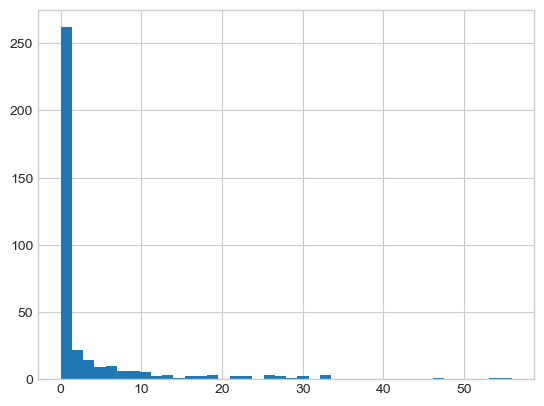

In [8]:
plt.hist(rainfall_mm, 40);

# B. Comparison Operators as Ufuncs

In [9]:
x = np.array([1, 2, 3, 4, 5])


In [10]:
x <3

array([ True,  True, False, False, False])

In [11]:
x >3

array([False, False, False,  True,  True])

In [12]:
x <= 3

array([ True,  True,  True, False, False])

In [13]:
x >= 3

array([False, False,  True,  True,  True])

In [14]:
x != 3

array([ True,  True, False,  True,  True])

In [15]:
x == 3

array([False, False,  True, False, False])

In [16]:
(2*x) == (x**2)

array([False,  True, False, False, False])

# C. Working with Boolean Arrays

In [17]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]], dtype=int64)

### C.1 Counting Entries

In [18]:
np.count_nonzero(x < 6)

8

In [19]:
np.sum(x < 6)

8

In [20]:
np.sum(x < 6, axis=1)

array([3, 2, 3])

In [21]:
np.any(x > 8)

True

In [22]:
np.any(x < 0)

False

In [23]:
np.all( x==6)

False

In [24]:
np.all(x<10)

True

In [25]:
np.all(x<8, axis=1)

array([False, False,  True])

### C.2 Boolean Operators

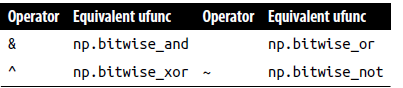

In [26]:
np.sum((rainfall_mm > 10) & (rainfall_mm < 20))

16

In [27]:
np.sum(~( (rainfall_mm <= 10) | (rainfall_mm >= 20) ))

16

# D. Boolean Arrays as Masks

In [28]:
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]], dtype=int64)

In [29]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [30]:
x[x<5]

array([4, 0, 3, 3, 1, 3, 4, 0], dtype=int64)

In [31]:
rainy = (rainfall_mm > 0)

days = np.arange(365)
summer = (days > 172) & (days < 262)

In [32]:
print("Median precip on rainy days in 2015 (mm): ",
np.median(rainfall_mm[rainy]))
print("Median precip on summer days in 2015 (mm): ",
np.median(rainfall_mm[summer]))
print("Maximum precip on summer days in 2015 (mm): ",
np.max(rainfall_mm[summer]))
print("Median precip on non-summer rainy days (mm):",
np.median(rainfall_mm[rainy & ~summer]))

Median precip on rainy days in 2015 (mm):  3.8
Median precip on summer days in 2015 (mm):  0.0
Maximum precip on summer days in 2015 (mm):  32.5
Median precip on non-summer rainy days (mm): 4.1


# D. Using the Keywords and/or Versus the Operators &/|

* `and` and `or` operate on the object as a whole. 
* `&` and `|` operate on the elements within the object.

In [33]:
bool(42), bool(0)

(True, False)

In [34]:
bool(42 and 0)

False

In [35]:
bool(42 or 0)

True

In [36]:
bin(42)

'0b101010'

In [37]:
bin(59)

'0b111011'

In [38]:
bin(42 & 59)

'0b101010'

In [39]:
bin(42 | 59)

'0b111011'

In [40]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [41]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [42]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [43]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()